In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Sales_store=pd.read_csv('/content/store.csv')
Sales_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
Sales_store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [4]:
#Handle null values of numeric data types
Sales_store['CompetitionDistance'].fillna(Sales_store['CompetitionDistance'].mean(),inplace=True)
Sales_store['CompetitionOpenSinceMonth'].fillna(Sales_store['CompetitionOpenSinceMonth'].mean(),inplace=True)
Sales_store['CompetitionOpenSinceYear'].fillna(Sales_store['CompetitionOpenSinceYear'].mean(),inplace=True)
Sales_store['Promo2SinceWeek'].fillna(Sales_store['Promo2SinceWeek'].mean(),inplace=True)
Sales_store['Promo2SinceYear'].fillna(Sales_store['Promo2SinceYear'].mean(),inplace=True)

In [5]:
#handle null value of object type
Sales_store['PromoInterval'].fillna(Sales_store['PromoInterval'].mode()[0],inplace=True)

In [6]:
Sales_store.duplicated().sum()

np.int64(0)

In [7]:
Sales_store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [8]:
Sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
Sales_train=pd.read_csv('/content/train.csv')


In [10]:
Sales_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [11]:
#1. Isolate the dataset into time series data

In [12]:
# Convert Date to datetime format
Sales_train["Date"] = pd.to_datetime(Sales_train["Date"], format='mixed')
Sales_train["Date"]

,Date
0,2015-07-31
1,2015-07-31
2,2015-07-31
3,2015-07-31
4,2015-07-31
...,...
980913,2013-02-02
980914,2013-02-02
980915,2013-02-02
980916,2013-02-02


In [13]:
#Set Date as index


# Convert Date to datetime format
Sales_train["Date"] = pd.to_datetime(Sales_train["Date"])

#Aggregate sales by date (sum over all stores for simplicity)
time_series_data = Sales_train.groupby("Date")["Sales"].sum().reset_index()

#Set Date as index
time_series_data.set_index("Date", inplace=True)

time_series_data

,Sales
Date,
2013-02-01,0.0
2013-02-02,3063741.0
2013-02-03,171565.0
2013-02-04,10333651.0
2013-02-05,8841604.0
...,...
2015-07-27,10707292.0
2015-07-28,9115073.0
2015-07-29,8499962.0


In [14]:
#Aggregate sales by date (sum over all stores for simplicity)
time_series_data = Sales_train.groupby("Date")["Sales"].sum().reset_index()

time_series_data

,Date,Sales
0,2013-02-01,0.0
1,2013-02-02,3063741.0
2,2013-02-03,171565.0
3,2013-02-04,10333651.0
4,2013-02-05,8841604.0
...,...,...
906,2015-07-27,10707292.0
907,2015-07-28,9115073.0
908,2015-07-29,8499962.0
909,2015-07-30,8798854.0


In [15]:
# Convert Date to datetime format
time_series_data["Date"] = pd.to_datetime(time_series_data["Date"])

# Aggregate sales per date (though you've already done this)
daily = time_series_data.groupby("Date", as_index=False)["Sales"].sum()

# Optionally, set Date as index for time-series ops:
daily.set_index("Date", inplace=True)

# Example: resample to monthly totals
monthly = daily.resample("M").sum()

print(daily.head())
print(monthly.head())


                 Sales
Date                  
2013-02-01         0.0
2013-02-02   3063741.0
2013-02-03    171565.0
2013-02-04  10333651.0
2013-02-05   8841604.0
                  Sales
Date                   
2013-02-28  160613268.0
2013-03-31  201180369.0
2013-04-30  183431432.0
2013-05-31  185411063.0
2013-06-30  180702351.0


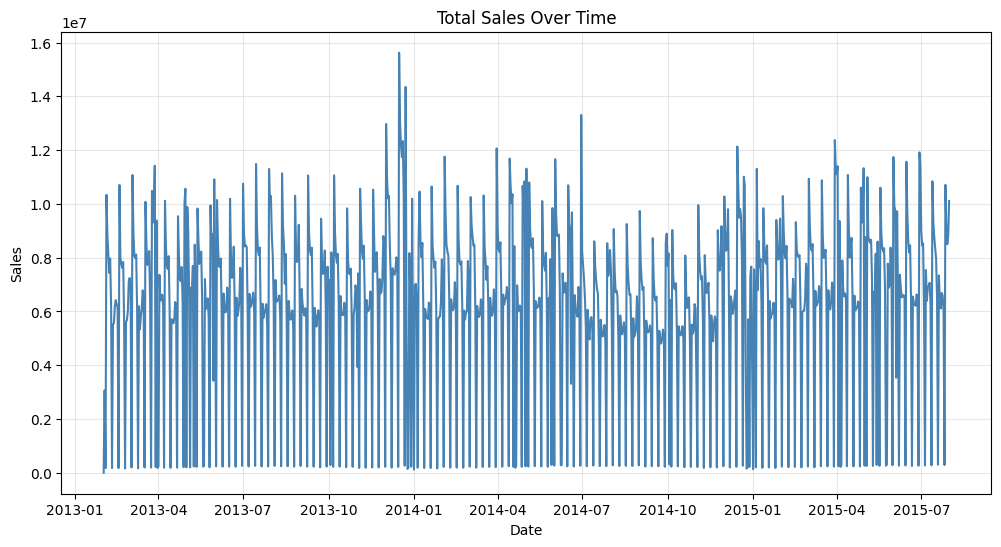

=== Augmented Dickey-Fuller Sales_test ===
Sales_test Statistic : -4.6576
p-value        : 0.0001
Critical Value (1%) : -3.4377
Critical Value (5%) : -2.8648
Critical Value (10%) : -2.5685

=== KPSS Sales_test ===
Sales_test Statistic : 0.2103
p-value        : 0.1000
Critical Value (10%) : 0.3470
Critical Value (5%) : 0.4630
Critical Value (2.5%) : 0.5740
Critical Value (1%) : 0.7390


/tmp/ipython-input-16-2325462562.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(ts['Sales'], regression='c', nlags='auto')


In [16]:
from statsmodels.tsa.stattools import adfuller, kpss

# Ensure dates are datetime and sorted
ts = time_series_data.copy()
ts['Date'] = pd.to_datetime(ts['Date'])
ts.sort_values('Date', inplace=True)
ts.set_index('Date', inplace=True)

# 1 Plot the time series
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts['Sales'], color='steelblue', linewidth=1.5)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(alpha=0.3)
plt.show()

# 2️ ADF Sales_test
adf_res = adfuller(ts['Sales'], autolag='AIC')
print("=== Augmented Dickey-Fuller Sales_test ===")
print(f"Sales_test Statistic : {adf_res[0]:.4f}")
print(f"p-value        : {adf_res[1]:.4f}")
for key, cv in adf_res[4].items():
    print(f"Critical Value ({key}) : {cv:.4f}")

# 3️ KPSS Sales_test
print("\n=== KPSS Sales_test ===")
kpss_res = kpss(ts['Sales'], regression='c', nlags='auto')
print(f"Sales_test Statistic : {kpss_res[0]:.4f}")
print(f"p-value        : {kpss_res[1]:.4f}")
for key, cv in kpss_res[3].items():
    print(f"Critical Value ({key}) : {cv:.4f}")


# This plot provides strong evidence that the sales time series is **stationary**:

- **The sales trend fluctuates** with visible ups and downs—suggesting seasonal patterns or cyclical behavior.
- The **Augmented Dickey-Fuller (ADF) test** shows a *very low p-value (0.0001)* and a test statistic much lower than the critical values. This means we **reject the null hypothesis** of non-stationarity—the data doesn’t drift over time.
- The **KPSS test**, used as a complement, has a test statistic (0.2103) that is **lower than all critical values**, with a high p-value (0.1). This means we **fail to reject the null hypothesis** that the series is stationary.



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Check whether your time Series Data is Stationary

#The Augmented Dickey-Fuller (ADF) Sales_test, implemented in statsmodels as adfuller(), is a statistical Sales_test used to check if a time series is stationary (i.e., if its properties like mean and variance remain constant over time).

#Augmented Dickey-Fuller Sales_test

In [18]:
from statsmodels.tsa.stattools import adfuller

def stationarity_adf(series, alpha=0.05):
    result = adfuller(series.dropna())
    Sales_test_stat, p_val, used_lag, _, crit_values, _ = (*result[:4], result[4], result[5:])

    print(f"ADF Sales_test Statistic : {Sales_test_stat:.4f}")
    print(f"p-value             : {p_val:.4f}")
    print("Critical Values:")
    for level, cv in crit_values.items():
        print(f"  {level} : {cv:.4f}")

    if p_val <= alpha:
        print(f"→ p ≤ {alpha}: Likely *stationary* (reject H₀)")
    else:
        print(f"→ p > {alpha}: Likely *non-stationary* (fail to reject H₀)")
    print(f"Lags used : {used_lag}\n")

# Example usage:
stationarity_adf(time_series_data["Sales"], alpha=0.05)


ADF Sales_test Statistic : -4.6576
p-value             : 0.0001
Critical Values:
  1% : -3.4377
  5% : -2.8648
  10% : -2.5685
→ p ≤ 0.05: Likely *stationary* (reject H₀)
Lags used : 20




- Your **ADF test statistic is -4.6576**, which is **lower than all three critical values**, even at the strictest level (1%).  
- The **p-value is 0.0001**, which is **way below 0.05**. That’s the green light to **reject the null hypothesis (non-stationarity)**.
- Since you used **20 lags**, it’s a reasonably thorough test that accounts for underlying autocorrelation.

**Bottom line**: Your time series is statistically **stationary**, meaning its underlying patterns—like mean and variance—don’t shift over time. That’s excellent for ARIMA-type models, which thrive on stable input.


#Depending on your conclusion from 2 above difference your time series data


In [19]:
#  Apply Differencing if Non-Stationary
time_series_data["Sales_Diff"] = time_series_data["Sales"].diff().dropna()

# Check stationarity again after differencing
stationarity_adf(time_series_data["Sales_Diff"].dropna())

ADF Sales_test Statistic : -13.7831
p-value             : 0.0000
Critical Values:
  1% : -3.4377
  5% : -2.8648
  10% : -2.5685
→ p ≤ 0.05: Likely *stationary* (reject H₀)
Lags used : 19





- The sales data is **highly stationary**—so much so that differencing isn’t needed.
- Using **19 lags** helps capture underlying autocorrelation, reinforcing the reliability of this result.
- The rejection of the null hypothesis (non-stationarity) is *almost absolute* in this case.


## Check for autocorrelation and partial autocorrelation

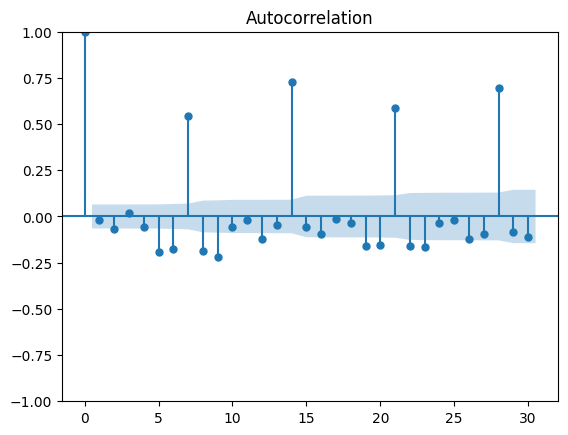

In [20]:
plot_acf(time_series_data["Sales"])
plt.title("Autocorrelation")
plt.show()

This is an autocorrelation plot, which helps analyze how a time series (likely sales data) is related to its past values.

Lag 0 is always 1 – The correlation of a time series with itself is always 1.

Strong spikes at regular intervals – There are high autocorrelations at lags 7, 14, 21, and 28, suggesting a weekly sales pattern.

Lower values for other lags – Other points fluctuate around zero, meaning sales are less correlated with non-weekly lags.

# Partial Autocorrelation plot

Text(0.5, 1.0, 'Partial Autocorrelation')

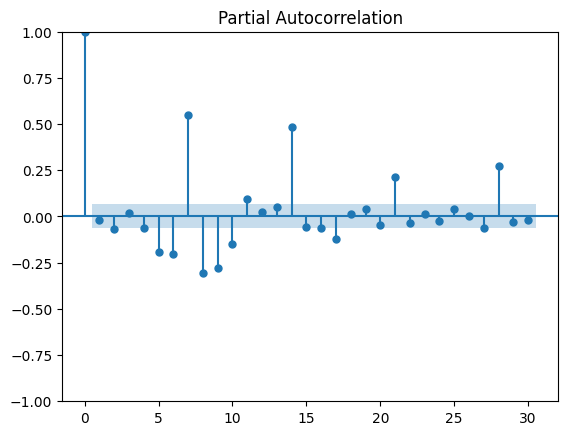

In [21]:
plot_pacf(time_series_data["Sales"])
plt.title("Partial Autocorrelation")

This is a Partial Autocorrelation Function (PACF) plot, which helps determine the direct relationship between a time series and its past values while removing the effects of intermediate lags.

Key Observations:
Lag 0 is always 1 – A time series is always 100% correlated with itself.

Significant spikes at lags 7, 14, and 28 – These suggest a weekly seasonality, similar to the autocorrelation (ACF) plot.

Weaker correlations beyond the first few lags – This means that, after accounting for the effects of closer lags, further lags contribute less directly to predicting sales.

ACF shows overall correlation, including indirect effects.

PACF removes indirect relationships, showing only the direct impact of each lag.

#Many models, like ARIMA, assume that the time series is stationary.

In [22]:
## Transform the time series data into supervised learning data by creating a new y(target) column.

# Selecting relevant columns (time-dependent features)
#Sales_train = Sales_train[['Sales','Customers']]

# Creating lag features (previous days' sales as predictors)
Sales_train['Sales_previous_day'] = Sales_train['Sales'].shift(1)  # Sales of the previous day
Sales_train['Sales_a_week_ago'] = Sales_train['Sales'].shift(7)  # Sales from a week ago
Sales_train['Sales_two_week_ago'] = Sales_train['Sales'].shift(14)  # Sales from two weeks ago

# Creating the target variable (next day's sales)
Sales_train['Target_sale'] = Sales_train['Sales'].shift(-1)  # Target: Sales of the next day

# Dropping NaN values created due to shifting
Sales_train.dropna(inplace=True)

# Display first few rows
print(Sales_train.head())

    Store  DayOfWeek       Date    Sales  Customers  Open  Promo StateHoliday  \
14     15          5 2015-07-31   9191.0      766.0   1.0    1.0            0   
15     16          5 2015-07-31  10231.0      979.0   1.0    1.0            0   
16     17          5 2015-07-31   8430.0      946.0   1.0    1.0            0   
17     18          5 2015-07-31  10071.0      936.0   1.0    1.0            0   
18     19          5 2015-07-31   8234.0      718.0   1.0    1.0            0   

    SchoolHoliday  Sales_previous_day  Sales_a_week_ago  Sales_two_week_ago  \
14            1.0              6544.0            8492.0              5263.0   
15            1.0              9191.0            8565.0              6064.0   
16            1.0             10231.0            7185.0              8314.0   
17            1.0              8430.0           10457.0             13995.0   
18            1.0             10071.0            8959.0              4822.0   

    Target_sale  
14      10231.0  
15

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the 'Sales' column for sliding window transformation
Sales_train = Sales_train[['Sales']]

# Define the sliding window size
window_size = 7

# Create lag features using a sliding window approach
for i in range(1, window_size + 1):
    Sales_train[f'Sales_lag_{i}'] = Sales_train['Sales'].shift(i)

# Define the target variable (next day's sales)
Sales_train['y'] = Sales_train['Sales'].shift(-1)

# Drop NaN values due to shifting
Sales_train.dropna(inplace=True)

# Separate features (X) and target (y)
X = Sales_train.drop(columns=['y'])
y = Sales_train['y'].values.reshape(-1, 1)  # Reshape for scaling

# Applying sliding window to Sales_store.merge (as it contains 'Sales')
Sales_train = Sales_train[['Sales']]  # Reset Sales_store.merge to only 'Sales' column

# Define the sliding window size
window_size = 7

# Create lag features using a sliding window approach
for i in range(1, window_size + 1):
    Sales_train[f'Sales_lag_{i}'] = Sales_train['Sales'].shift(i)

# Define the target variable (next day's sales)
Sales_train['y'] = Sales_train['Sales'].shift(-1)

# Drop NaN values due to shifting
Sales_train.dropna(inplace=True)

# Separate features (X) and target (y)
X = Sales_train.drop(columns=['y'])
y = Sales_train['y'].values.reshape(-1, 1)  # Reshape for scaling

In [24]:
## Scale data to range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Use the index from X instead of Sales_store
X_scaled_Sales_store = pd

In [25]:
Sales_test=pd.read_csv('/content/test.csv')

In [26]:
Sales_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [27]:
Sales_train

,Sales,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_lag_4,Sales_lag_5,Sales_lag_6,Sales_lag_7,y
28,9411.0,7301.0,13213.0,7818.0,14180.0,14190.0,7273.0,6566.0,4776.0
29,4776.0,9411.0,7301.0,13213.0,7818.0,14180.0,14190.0,7273.0,7248.0
30,7248.0,4776.0,9411.0,7301.0,13213.0,7818.0,14180.0,14190.0,6395.0
31,6395.0,7248.0,4776.0,9411.0,7301.0,13213.0,7818.0,14180.0,10789.0
32,10789.0,6395.0,7248.0,4776.0,9411.0,7301.0,13213.0,7818.0,11144.0
...,...,...,...,...,...,...,...,...,...
980909,4536.0,5789.0,7441.0,7315.0,6426.0,10646.0,2619.0,3774.0,7191.0
980910,7191.0,4536.0,5789.0,7441.0,7315.0,6426.0,10646.0,2619.0,8121.0
980911,8121.0,7191.0,4536.0,5789.0,7441.0,7315.0,6426.0,10646.0,9053.0
980912,9053.0,8121.0,7191.0,4536.0,5789.0,7441.0,7315.0,6426.0,5294.0


In [28]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
Sales_train = pd.DataFrame(Sales_train,columns=["Sales"])

# Normalize data

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Sales_train)

In [31]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

In [32]:
# Split data into Sales_training and Sales_testing sets
split = int(0.8 * len(X))
X_Sales_train, X_Sales_test = X[:split], X[split:]
y_Sales_train, y_Sales_test = y[:split], y[split:]

In [33]:
# Reshape for LSTM input (samples, time steps, features)
X_Sales_train = X_Sales_train.reshape((X_Sales_train.shape[0], X_Sales_train.shape[1], 1))
X_Sales_test = X_Sales_test.reshape((X_Sales_test.shape[0], X_Sales_test.shape[1], 1))

In [34]:
model = Sequential([
    LSTM(25, activation="relu", return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])

In [35]:
# Compile and Sales_train the model
model.compile(optimizer="RMSprop", loss="mse")
model.fit(X, y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 167s 5ms/step - loss: 0.0042
Epoch 2/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 163s 5ms/step - loss: 0.0041
Epoch 3/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 209s 6ms/step - loss: 0.0041
Epoch 4/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 193s 5ms/step - loss: 0.0041
Epoch 5/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 159s 5ms/step - loss: 0.0041
Epoch 6/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 202s 5ms/step - loss: 0.0041
Epoch 7/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 162s 5ms/step - loss: 0.0041
Epoch 8/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 201s 5ms/step - loss: 0.0041
Epoch 9/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 159s 5ms/step - loss: 0.0041
Epoch 10/10
30653/30653 ━━━━━━━━━━━━━━━━━━━━ 162s 5ms/step - loss: 0.0041


In [36]:
#model.summary()

In [37]:
# Predict on Sales_test data
predictions = model.predict(X_Sales_test)
predictions

6131/6131 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


array([[0.01726556],
       [0.00679415],
       [0.00089836],
       ...,
       [0.13290209],
       [0.1415826 ],
       [0.15884353]], dtype=float32)

In [38]:
# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_Sales_test_actual = scaler.inverse_transform(y_Sales_test.reshape(-1, 1))
print(y_Sales_test_actual)

[[   0.]
 [   0.]
 [   0.]
 ...
 [8121.]
 [9053.]
 [5294.]]


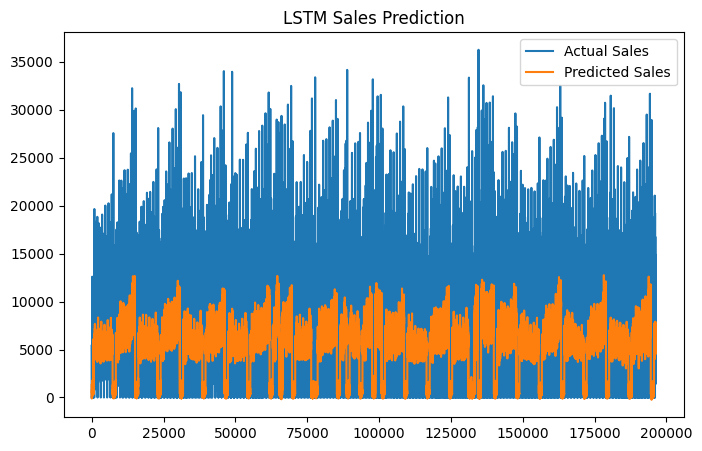

In [39]:
# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(y_Sales_test_actual, label="Actual Sales")
plt.plot(predictions, label="Predicted Sales")
plt.legend()
plt.title("LSTM Sales Prediction")
plt.show()

This plot shows the actual vs. predicted sales using an LSTM (Long Short-Term Memory) model, a type of neural network designed for time series forecasting.

Blue Line (Actual Sales)
Represents real historical sales data.
Shows high variability with spikes, indicating seasonality and trends.

Orange Line (Predicted Sales)
Represents the sales forecast generated by the LSTM model.
Captures the general pattern of actual sales but appears underestimated in some high peaks.


In [41]:
import keras
import IPython
from IPython.display import FileLink

# Save the model in native Keras format
keras.saving.save_model(model, "lstm_sales_model.keras")

# Create a clickable file download link
display(FileLink("lstm_sales_model.keras"))


/content/lstm_sales_model.keras